#                                          **STUDENT FEEDBACK SENTIMENT ANALYSIS**





In [4]:
import zipfile
import os

zip_path = "archive (11).zip"
extract_path = "student_feedback_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['finalDataset0.2.xlsx']

In [5]:
import pandas as pd

df = pd.read_excel("student_feedback_data/finalDataset0.2.xlsx")

df.head()


,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             185 non-null    int64  
 1   teaching.1           185 non-null    object 
 2   coursecontent        184 non-null    float64
 3   coursecontent.1      185 non-null    object 
 4   examination          184 non-null    float64
 5   Examination          185 non-null    object 
 6   labwork              185 non-null    int64  
 7   labwork.1            185 non-null    object 
 8   library_facilities   182 non-null    float64
 9    library_facilities  185 non-null    object 
 10  extracurricular      185 non-null    int64  
 11  extracurricular.1    185 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 17.5+ KB


In [6]:
df = df.rename(columns={
    'teaching': 'teaching_score',
    'teaching.1': 'teaching_text',
    'coursecontent': 'coursecontent_score',
    'coursecontent.1': 'coursecontent_text',
    'examination': 'examination_score',
    'Examination': 'examination_text',
    'labwork': 'labwork_score',
    'labwork.1': 'labwork_text',
    'library_facilities': 'library_score',
    ' library_facilities': 'library_text', # Corrected: target column with leading space
    'extracurricular': 'extracurricular_score',
    'extracurricular.1': 'extracurricular_text'
})

df.head()

,teaching_score,teaching_text,coursecontent_score,coursecontent_text,examination_score,examination_text,labwork_score,labwork_text,library_score,library_text,extracurricular_score,extracurricular_text
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [5]:
df.isnull().sum()


,0
teaching_score,0
teaching_text,0
coursecontent_score,1
coursecontent_text,0
examination_score,1
examination_text,0
labwork_score,0
labwork_text,0
library_score,3
library_facilities,0


In [6]:
# Fill missing numeric scores with column mean
score_cols = [
    'teaching_score',
    'coursecontent_score',
    'examination_score',
    'labwork_score',
    'library_score',
    'extracurricular_score'
]

for col in score_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()


/tmp/ipython-input-2972224844.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
teaching_score,0
teaching_text,0
coursecontent_score,0
coursecontent_text,0
examination_score,0
examination_text,0
labwork_score,0
labwork_text,0
library_score,0
library_facilities,0


In [7]:
df['overall_score'] = df[score_cols].mean(axis=1)
df[['overall_score']].head()


,overall_score
0,0.166667
1,0.333333
2,1.000000
3,-0.166667
4,1.000000


In [27]:
def label_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score <= 2:
        return 'Negative'
    else:
        return 'Neutral'


df['sentiment_label'] = df['overall_score'].apply(label_sentiment)
df['sentiment_label'].value_counts()


,count
sentiment_label,
Negative,185


In [9]:
!pip install textblob vaderSentiment wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.5 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


In [38]:
text_cols = [
    'teaching_text',
    'coursecontent_text',
    'examination_text',
    'labwork_text',
    'library_text', # Updated column name after renaming
    'extracurricular_text'
]

df['combined_text'] = df[text_cols].astype(str).agg(' '.join, axis=1)

In [39]:
df['combined_text'] = df[text_cols].astype(str).agg(' '.join, axis=1)
df['textblob_polarity'] = df['combined_text'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

In [14]:
analyzer = SentimentIntensityAnalyzer()

df['vader_compound'] = df['combined_text'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)


In [16]:
def vader_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['text_sentiment'] = df['vader_compound'].apply(vader_label)
df['text_sentiment'].value_counts()


,count
text_sentiment,
Positive,177
Negative,6
Neutral,2


/tmp/ipython-input-2164077719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


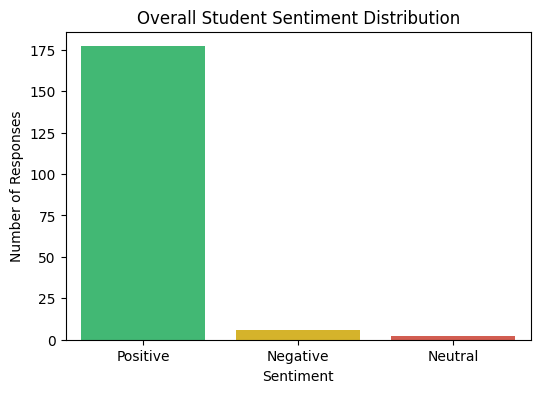

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='text_sentiment',
    data=df,
    palette=['#2ecc71', '#f1c40f', '#e74c3c']
)

plt.title('Overall Student Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Responses')
plt.show()


In [19]:
df['library_sentiment'] = df[' library_facilities'].apply(
    lambda x: analyzer.polarity_scores(str(x))['compound']
)

df['library_sentiment_label'] = df['library_sentiment'].apply(vader_label)
df['library_sentiment_label'].value_counts()

,count
library_sentiment_label,
Positive,140
Neutral,35
Negative,10


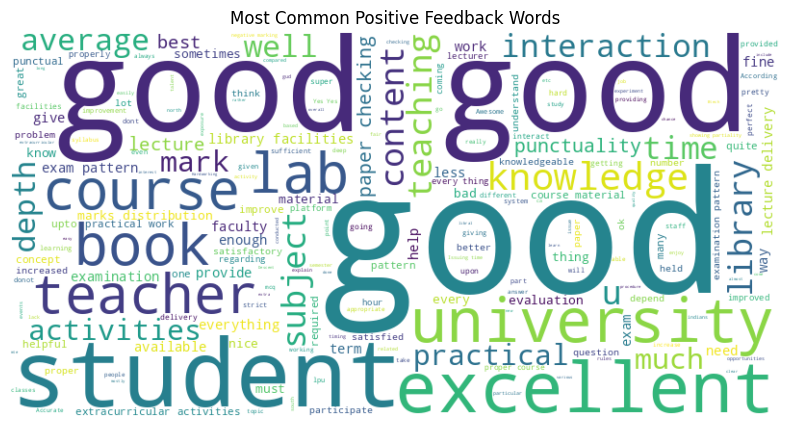

In [20]:
positive_text = ' '.join(
    df[df['text_sentiment'] == 'Positive']['combined_text']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Feedback Words')
plt.show()


In [35]:
from IPython.display import HTML

# 🔹 1. Get counts from pandas
sentiment_counts = df['library_sentiment_label'].value_counts()

positive = int(sentiment_counts.get('Positive', 0))
neutral  = int(sentiment_counts.get('Neutral', 0))
negative = int(sentiment_counts.get('Negative', 0))

# 🔹 2. Pass values to Chart.js
HTML(f"""
<!DOCTYPE html>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>

<style>
  body {{
    margin: 0;
    background: transparent;
    font-family: Arial, sans-serif;
  }}

  .chart-box {{
    width: 100%;
    max-width: 420px;
    margin: auto;
    background: #0f172a;
    padding: 20px;
    border-radius: 20px;
    text-align: center;
  }}

  h3 {{
    color: #e5e7eb;
    margin-bottom: 10px;
    font-weight: 600;
  }}

  button {{
    margin-top: 10px;
    padding: 8px 14px;
    border: none;
    border-radius: 8px;
    background: #22c55e;
    color: #022c22;
    font-weight: bold;
    cursor: pointer;
  }}
</style>
</head>

<body>

<div class="chart-box">
  <h3>Sentiment Distribution</h3>
  <canvas id="pieChart"></canvas>
  <button onclick="downloadChart()">Export as PNG</button>
</div>

<script>
const ctx = document.getElementById("pieChart").getContext("2d");

// Data from pandas 👇
const dataCounts = [{positive}, {neutral}, {negative}];
const total = dataCounts.reduce((a, b) => a + b, 0);

// 🌈 Color-blind friendly gradients
const positiveGradient = ctx.createRadialGradient(150,150,30,150,150,150);
positiveGradient.addColorStop(0, "#56B4E9");
positiveGradient.addColorStop(1, "#0072B2");

const neutralGradient = ctx.createRadialGradient(150,150,30,150,150,150);
neutralGradient.addColorStop(0, "#9CA3AF");
neutralGradient.addColorStop(1, "#6B7280");

const negativeGradient = ctx.createRadialGradient(150,150,30,150,150,150);
negativeGradient.addColorStop(0, "#E69F00");
negativeGradient.addColorStop(1, "#D55E00");

new Chart(ctx, {{
  type: "pie",
  data: {{
    labels: ["Positive", "Neutral", "Negative"],
    datasets: [{{
      data: dataCounts,
      backgroundColor: [positiveGradient, neutralGradient, negativeGradient],
      borderWidth: 0,
      hoverOffset: 18
    }}]
  }},
  options: {{
    responsive: true,
    animation: {{
      animateRotate: true,
      duration: 1500,
      easing: "easeOutQuart"
    }},
    plugins: {{
      legend: {{
        position: "bottom",
        labels: {{
          color: "#e5e7eb",
          font: {{ size: 13 }}
        }}
      }},
      tooltip: {{
        callbacks: {{
          label: function(context) {{
            const value = context.parsed;
            const percent = ((value / total) * 100).toFixed(1);
            return `${{context.label}}: ${{value}} (${{percent}}%)`;
          }}
        }}
      }}
    }}
  }}
}});

// 🖼 Export
function downloadChart() {{
  const link = document.createElement('a');
  link.download = 'sentiment_distribution.png';
  link.href = document.getElementById('pieChart').toDataURL('image/png');
  link.click();
}}
</script>

</body>
</html>
""")


## Define Custom Stopwords




**Reasoning**:
I need to import the default STOPWORDS, define custom stopwords like 'good' and 'excellent', and then combine them to create an updated stopwords list named `custom_stopwords`.



In [29]:
from wordcloud import STOPWORDS

# Create a new set of custom stopwords, including 'good' and 'excellent'
custom_additional_stopwords = {'good', 'excellent', 'great', 'best', 'well', 'much', 'many', 'proper', 'all', 'things', 'university', 'student', 'time'}

# Combine the default STOPWORDS with the custom stopwords
custom_stopwords = STOPWORDS.union(custom_additional_stopwords)

print("Custom stopwords defined successfully.")

Custom stopwords defined successfully.


**Reasoning**:
The refined word cloud was generated after preprocessing the feedback text to remove generic sentiment words and noise. This allows clearer identification of domain-specific factors such as teaching quality, course structure, and laboratory facilities that contribute to positive student sentiment.




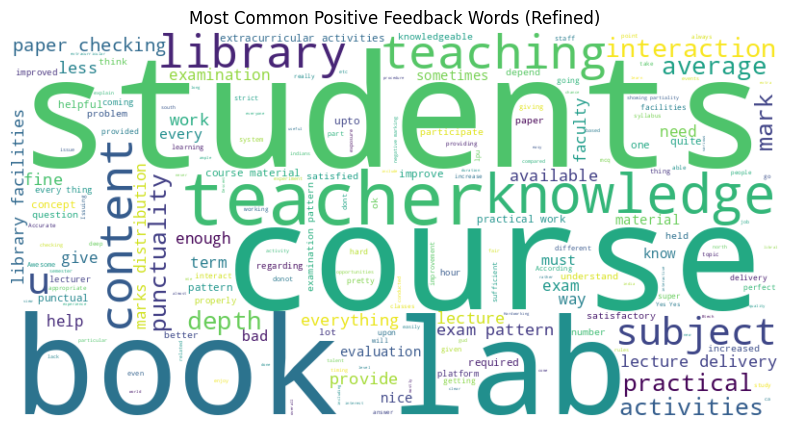

In [30]:
wordcloud_refined = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_refined, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Feedback Words (Refined)')
plt.show()

## ⚠️ Limitations of the Study

### 1. Rule-Based Sentiment Analysis
This analysis uses **TextBlob and VADER**, which are lexicon-based sentiment models.  
These approaches may fail to correctly interpret **sarcasm, informal language, or contextual meaning** often present in student feedback.

---

### 2. No Domain-Specific Fine-Tuning
The sentiment models were not trained specifically on **educational feedback data**.  
As a result, academic phrases such as *“strict evaluation”* or *“tough exams”* may be misclassified as negative even when feedback is constructive.

---

### 3. Limited Dataset Size
The dataset contains feedback from **185 students**, which may not fully represent the views of a larger or more diverse student population.

---

### 4. Lack of Demographic Information
The dataset does not include student demographics such as **year of study, department, or academic background**, limiting deeper segmentation analysis.

---

### 5. Subjectivity of Feedback
Student feedback is inherently **subjective**, influenced by personal expectations and individual experiences.

---

### 6. Language Constraints
The analysis assumes feedback is written in **standard English**.  
Spelling errors, abbreviations, or mixed-language responses may reduce sentiment accuracy.

---

### 7. Visualization Interpretation
Although interactive and accessible visualizations are used, some insights may require **statistical validation** beyond visual trends.
